# This notebook creates some basic visualizations of the data for whole discourse. The data is NOT related to any specific category.

In [2]:
import altair as alt
import pandas as pd
import numpy as np
import os
import IPython.display # for displaying HTML images

def create_stacked_bar_chart(raw_metrics, subject, path_to_static_folder):
    # Define the metrics we are interested in
    metrics = ['likes_received', 'likes_given', 'topics_created', 'posts_created', 'days_visited', 'solutions']

    # Ensure 'username' is included when filtering
    filtered_metrics = raw_metrics.set_index(['username'])[metrics].loc[:, (raw_metrics[metrics] != 0).any()]

    # Transform data to long format
    long_df = filtered_metrics.reset_index().melt(id_vars=["username"], var_name="metric", value_name="count")


    if not long_df.empty:
        # Create the Altair stacked bar chart
        chart = alt.Chart(long_df).mark_bar().encode(
            x=alt.X("count:Q", title="Total User Interactions", 
                    axis=alt.Axis(format="~s", titleFontSize=14)),  # Formatting x-axis ticks
            y=alt.Y("username:N", title="Users", sort="-x", 
                    axis=alt.Axis(titleFontSize=14)),  # Changed from user_id to username
            color=alt.Color("metric:N", title="Activity Type"),
            tooltip=["username", "metric", "count"]  # Changed tooltip from user_id to username
        ).properties(
            title=f"Most Active Users ({subject})",
            width=600,
            height=400
        )


        # Save as interactive HTML
        viz_folder = os.path.join(path_to_static_folder, "visualizations")  # Folder for visualizations
        os.makedirs(viz_folder, exist_ok=True)
        chart.save(f'{viz_folder}/most_active_users_{subject.lower().replace(" ","_")}.html')

        # Display in Jupyter Notebook
        IPython.display.display(chart)
    else:
        print("No non-zero metrics to display.")


In [3]:
path_to_static_folder = "../static"
full_path = "../data/course_excel_data_t1_2024/data_all_users.xlsx"

# Load the unnormalized scores
unnormalized_df = pd.read_excel(full_path, sheet_name="unnormalized_scores")
# Remove all rows whose user_id is <=5, because these can be bots also
unnormalized_df = unnormalized_df[unnormalized_df['user_id'] > 5]

# Select top 10 users based on their total engagement score
top_10_users = unnormalized_df.head(10) # Note the unnormalized_df is already sorted by total_engagement_score in descending order
top_10_users

,user_id,likes_received,likes_given,days_visited,solutions,cheers,topics_created,posts_created,initial_score,z_score
1,348,637,227,96,119,4960,26,877,1372.5,47.47
3,933,508,251,98,18,2412,54,463,899.9,31.10
4,11,532,132,98,11,2486,13,400,804.0,27.77
5,15826,493,181,98,4,1930,15,382,773.6,26.72
6,12082,208,56,97,3,1908,5,397,500.8,17.27
7,17066,99,78,97,38,1491,43,302,406.1,13.99
8,15475,200,59,98,1,1260,6,228,376.0,12.95
9,15517,112,38,97,1,1090,4,309,352.8,12.14
10,6616,107,273,98,10,1010,20,130,333.2,11.46
11,8189,206,88,98,1,990,2,141,329.9,11.35


In [16]:
id_username_mapping = pd.read_csv("../data/id_username_mapping.csv")
id_username_mapping.sample(5, random_state=42)

,user_id,username,name,email
15943,19538,be20b030,Sarthak Jain,be20b030@smail.iitm.ac.in
3836,4711,Anay,Anay,21f1005495@ds.study.iitm.ac.in
9162,12613,ayush_sharma001,Ayush Sharma,22f1001876@ds.study.iitm.ac.in
34769,38515,24f3002839,Saumya Radhanpara Jatinbhai,24f3002839@ds.study.iitm.ac.in
655,762,AVB,Boss veeraraghavan annapillai,21f1000044@ds.study.iitm.ac.in


In [17]:
top_10_users_2 = top_10_users.merge(id_username_mapping, on="user_id").drop(columns=["email", "user_id", "cheers", "name"])
top_10_users_2
# print(top_10_users_2.drop(columns=["email"]).to_markdown())

,likes_received,likes_given,days_visited,solutions,topics_created,posts_created,initial_score,z_score,username
0,637,227,96,119,26,877,1372.5,47.47,sayan
1,508,251,98,18,54,463,899.9,31.10,Anand
2,532,132,98,11,13,400,804.0,27.77,Karthik_POD
3,493,181,98,4,15,382,773.6,26.72,iitmanupam
4,208,56,97,3,5,397,500.8,17.27,PremKumarGupta
5,99,78,97,38,43,302,406.1,13.99,23f1000966
6,200,59,98,1,6,228,376.0,12.95,22f3002293
7,112,38,97,1,4,309,352.8,12.14,23f1000318
8,107,273,98,10,20,130,333.2,11.46,aaruni-kale
9,206,88,98,1,2,141,329.9,11.35,gNIKHIL


In [18]:
# Generate Altair visualization
create_stacked_bar_chart(top_10_users_2, subject="All Users", path_to_static_folder=path_to_static_folder)

alt.Chart(...)

# Explore the unnormalized df a bit more

In [20]:
unnormalized_df.describe().drop(columns=['user_id','initial_score','z_score'])

,likes_received,likes_given,days_visited,solutions,cheers,topics_created,posts_created
count,41911.000000,41911.000000,41911.000000,41911.000000,41911.000000,41911.000000,41911.000000
mean,0.397103,0.400468,3.337739,0.047601,7.150533,0.165804,0.766553
std,6.637176,4.959701,10.554417,0.890926,49.306754,1.415991,8.522700
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,637.000000,421.000000,98.000000,119.000000,4960.000000,69.000000,877.000000


In [10]:
# Find correlations between the different metrics
correlation_matrix = unnormalized_df.drop(columns=['user_id','initial_score','z_score', "cheers"]).corr()
correlation_matrix

,likes_received,likes_given,days_visited,solutions,topics_created,posts_created
likes_received,1.000000,0.618853,0.342391,0.526837,0.369187,0.869506
likes_given,0.618853,1.000000,0.418417,0.465536,0.443191,0.629025
days_visited,0.342391,0.418417,1.000000,0.281026,0.447842,0.451053
solutions,0.526837,0.465536,0.281026,1.000000,0.645496,0.677299
topics_created,0.369187,0.443191,0.447842,0.645496,1.000000,0.585461
posts_created,0.869506,0.629025,0.451053,0.677299,0.585461,1.000000


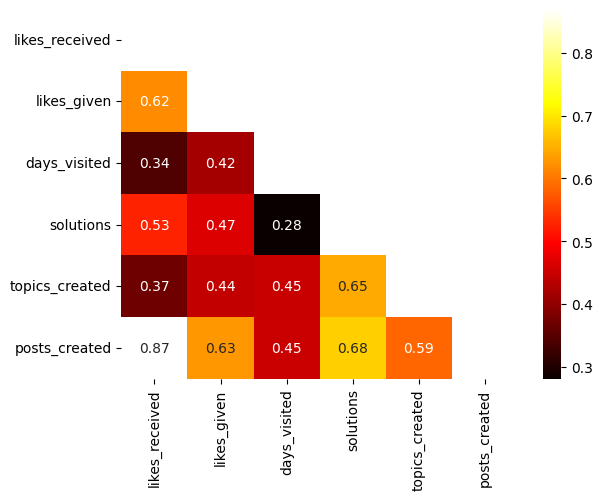

In [14]:
# A heatmap of the correlation matrix using seaborn
import seaborn as sns
import matplotlib.pyplot as plt
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap = "hot")
plt.show();
